In [1]:
import pandas as pd
import os
from all_aircrafts import all_aircrafts
import matplotlib.pyplot as plt
import seaborn as sns

loading wikipedia data from hard drive
There are 5 dataframes


In [2]:
path = os.path.join(".", "data", "planespotter", "2019-11-12 prodlist.xlsx")
planespotter_aircrafts = pd.read_excel(path)

In [3]:
planespotter_aircrafts.head()

,Aircraft Manufacturer,Aircraft Type,Operator,Operator ID,Operator Category,Operator Country,Operator Parent/Group,Parent/Group ID,Parent/Group Country,First Operator,...,Build Country,First Customer Delivery Date,Delivery Date Operator,Exit Date Operator,Nr. of Engines,Engine Manufacturer,Engine Type,Config (Pax/Combi/Cargo/Other),Seat Total,Age (Years)
0,Airbus,Airbus A300B1,Airbus Industrie,1336,Manufacturer,France,NaN,NaN,NaN,NaN,...,France,NaN,1972-01-01,NaN,2,General Electric,CF6-50,Other,0,1.7
1,Airbus,Airbus A300B1,TEA - Trans European Airlines,294,Airline,Belgium,NaN,NaN,NaN,TEA - Trans European Airlines,...,France,1974-11-01,1974-11-01,NaN,2,General Electric,CF6-50,NaN,0,30.4
2,Airbus,Airbus A300B2,SA Novespace,7216,Other,France,NaN,NaN,NaN,SA Novespace,...,France,2005-01-01,2005-01-01,NaN,2,General Electric,CF6-50,NaN,0,46.4
3,Airbus,Airbus A300B2,Air Inter,1309,Airline,France,NaN,NaN,NaN,Air Inter,...,France,1977-01-01,1977-01-01,NaN,2,General Electric,CF6-50,NaN,0,19.4
4,Airbus,Airbus A300B2,Air France,1306,Airline,France,Air France-KLM,11321.0,France,Air France,...,France,1974-05-01,1974-05-01,NaN,2,General Electric,CF6-50,NaN,0,23.1


In [4]:
planespotter_aircrafts_dictionnary = planespotter_aircrafts.groupby("Aircraft Type").count()
planespotter_aircrafts_dictionnary = planespotter_aircrafts_dictionnary.reset_index()
planespotter_aircrafts_dictionnary["Wiki name"] = planespotter_aircrafts_dictionnary["Aircraft Type"]
planespotter_aircrafts_dictionnary = planespotter_aircrafts_dictionnary[["Aircraft Type", "Wiki name"]]
planespotter_aircrafts_dictionnary = planespotter_aircrafts_dictionnary.rename(columns={"Aircraft Type": "Planespotter name"})
planespotter_aircrafts_dictionnary.head()

,Planespotter name,Wiki name
0,ATR 42,ATR 42
1,ATR 72,ATR 72
2,Airbus A220-100,Airbus A220-100
3,Airbus A220-300,Airbus A220-300
4,Airbus A300-600,Airbus A300-600


In [5]:
all_aircrafts = all_aircrafts.reset_index()
all_aircrafts = all_aircrafts.drop('index', axis=1)
all_aircrafts

,Model,Seats,First flight,Fuel burn kg/km,Fuel per seat L/100km,Sector km,CO2 per seat kg/100km,CO2 kg/km,Aircraft type
0,Antonov An-148 (241 nmi),89,2004,4.23,5.95,560.0,13.187973,13.05378,commuter_aircraft
1,Antonov An-158 (241 nmi),99,2010,4.34,5.47,560.0,12.124069,13.39324,commuter_aircraft
2,ATR 42-500,48,1995,1.26,3.15,560.0,6.981868,3.88836,commuter_aircraft
3,ATR 72-500,70,1997,1.42,2.53,560.0,5.607659,4.38212,commuter_aircraft
4,Beechcraft 1900D (226 nm),19,1982,1.00,6.57,560.0,14.562182,3.08600,commuter_aircraft
...,...,...,...,...,...,...,...,...,...
128,Boeing 777-9X,395,2020,9.04,2.85,13300.0,6.316928,27.89744,long_haul_aircraft
129,Boeing 787-8,243,2011,5.38,2.77,8610.0,6.139611,16.60268,long_haul_aircraft
130,Boeing 787-9,294,2013,5.85,2.49,8610.0,5.519000,18.05310,long_haul_aircraft
131,Boeing 787-9,304,2013,5.63,2.31,9208.0,5.120036,17.37418,long_haul_aircraft


# Export data

In [6]:
wiki_aircrafts_names = all_aircrafts.Model.unique()
wiki_aircrafts_names.sort()
path = os.path.join(".", "data", "wikipedia", "wiki_aircrafts_names.csv")
pd.Series(wiki_aircrafts_names).to_csv(path, header=True)

In [7]:
path = os.path.join(".", "data", "planespotter", "planespotter_aircratfs_dictionnary.csv")
planespotter_aircrafts_dictionnary.to_csv(path)

# Import data once manually updated

In [8]:
path = os.path.join(".", "data", "planespotter", "planespotter_aircratfs_dictionnary_corrected.csv")
planespotter_aircrafts_dictionnary_corrected = pd.read_csv(path)

# Merge all_aircrafts and the dictionnary

In [9]:
all_aircrafts = all_aircrafts.set_index('Model')
all_aircrafts.head()

,Seats,First flight,Fuel burn kg/km,Fuel per seat L/100km,Sector km,CO2 per seat kg/100km,CO2 kg/km,Aircraft type
Model,,,,,,,,
Antonov An-148 (241 nmi),89,2004,4.23,5.95,560.0,13.187973,13.05378,commuter_aircraft
Antonov An-158 (241 nmi),99,2010,4.34,5.47,560.0,12.124069,13.39324,commuter_aircraft
ATR 42-500,48,1995,1.26,3.15,560.0,6.981868,3.88836,commuter_aircraft
ATR 72-500,70,1997,1.42,2.53,560.0,5.607659,4.38212,commuter_aircraft
Beechcraft 1900D (226 nm),19,1982,1.00,6.57,560.0,14.562182,3.08600,commuter_aircraft


In [10]:
# Join planespotter_aircrafts_dictionnary_corrected and all_aircrafts
planespotter_aircrafts_dictionnary_corrected = planespotter_aircrafts_dictionnary_corrected.rename(columns={'Wiki name':'Model'})[["Model", "Planespotter name"]]
planespotter_aircrafts_dictionnary_corrected = planespotter_aircrafts_dictionnary_corrected.set_index('Model')
planespotter_aircrafts_dictionnary_corrected.head()

,Planespotter name
Model,
ATR 42-500,ATR 42
ATR 72-500,ATR 72
Airbus A220-100,Airbus A220-100
Airbus A220 100,Airbus A220-100
Airbus A220-300,Airbus A220-300


In [11]:
all_aircrafts_corrected = all_aircrafts.join(planespotter_aircrafts_dictionnary_corrected, how = 'inner')

In [12]:
all_aircrafts_corrected = all_aircrafts_corrected.reset_index().drop(['Model'], axis=1).rename(columns={"Planespotter name": "Model"}).set_index("Model")

In [13]:
all_aircrafts_corrected.head()

,Seats,First flight,Fuel burn kg/km,Fuel per seat L/100km,Sector km,CO2 per seat kg/100km,CO2 kg/km,Aircraft type
Model,,,,,,,,
ATR 42,48,1995,1.26,3.15,560.0,6.981868,3.88836,commuter_aircraft
ATR 72,70,1997,1.42,2.53,560.0,5.607659,4.38212,commuter_aircraft
Airbus A220-100,115,2013,2.80,3.07,1100.0,6.804551,8.64080,regional_aircraft
Airbus A220-300,140,2015,3.10,2.75,1100.0,6.095282,9.56660,regional_aircraft
Airbus A220-100,125,2013,2.57,2.57,930.0,5.696318,7.93102,regional_aircraft


In [14]:
all_aircrafts_corrected.index.is_unique

False

In [15]:
all_aircrafts_corrected = all_aircrafts_corrected.reset_index().groupby("Model").mean()
all_aircrafts_corrected.head()

,Seats,First flight,Fuel burn kg/km,Fuel per seat L/100km,Sector km,CO2 per seat kg/100km,CO2 kg/km
Model,,,,,,,
ATR 42,48.000000,1995.0,1.2600,3.1500,560.0,6.981868,3.888360
ATR 72,70.000000,1997.0,1.4200,2.5300,560.0,5.607659,4.382120
Airbus A220-100,121.666667,2013.0,2.5500,2.6400,1310.0,5.851470,7.869300
Airbus A220-300,148.750000,2015.0,2.7025,2.2075,1457.5,4.892849,8.339915
Airbus A318-100,124.000000,1995.0,2.9300,2.9500,1900.0,6.538575,9.041980


In [16]:
planespotter_aircrafts = planespotter_aircrafts.rename(columns={"Aircraft Type":"Model"}).reset_index().drop('index', axis = 1).set_index('Model')
planespotter_aircrafts.head()

,Aircraft Manufacturer,Operator,Operator ID,Operator Category,Operator Country,Operator Parent/Group,Parent/Group ID,Parent/Group Country,First Operator,First Operator ID,...,Build Country,First Customer Delivery Date,Delivery Date Operator,Exit Date Operator,Nr. of Engines,Engine Manufacturer,Engine Type,Config (Pax/Combi/Cargo/Other),Seat Total,Age (Years)
Model,,,,,,,,,,,,,,,,,,,,,
Airbus A300B1,Airbus,Airbus Industrie,1336,Manufacturer,France,NaN,NaN,NaN,NaN,NaN,...,France,NaN,1972-01-01,NaN,2,General Electric,CF6-50,Other,0,1.7
Airbus A300B1,Airbus,TEA - Trans European Airlines,294,Airline,Belgium,NaN,NaN,NaN,TEA - Trans European Airlines,294.0,...,France,1974-11-01,1974-11-01,NaN,2,General Electric,CF6-50,NaN,0,30.4
Airbus A300B2,Airbus,SA Novespace,7216,Other,France,NaN,NaN,NaN,SA Novespace,7216.0,...,France,2005-01-01,2005-01-01,NaN,2,General Electric,CF6-50,NaN,0,46.4
Airbus A300B2,Airbus,Air Inter,1309,Airline,France,NaN,NaN,NaN,Air Inter,1309.0,...,France,1977-01-01,1977-01-01,NaN,2,General Electric,CF6-50,NaN,0,19.4
Airbus A300B2,Airbus,Air France,1306,Airline,France,Air France-KLM,11321.0,France,Air France,1306.0,...,France,1974-05-01,1974-05-01,NaN,2,General Electric,CF6-50,NaN,0,23.1


In [17]:
aircrafts_airlines = all_aircrafts_corrected.join(planespotter_aircrafts, how = 'inner')

In [18]:
aircrafts_airlines.columns

Index(['Seats', 'First flight', 'Fuel burn kg/km', 'Fuel per seat L/100km',
       'Sector km', 'CO2 per seat kg/100km', 'CO2 kg/km',
       'Aircraft Manufacturer', 'Operator', 'Operator ID', 'Operator Category',
       'Operator Country', 'Operator Parent/Group', 'Parent/Group ID',
       'Parent/Group Country', 'First Operator', 'First Operator ID',
       'First Operator Category', 'First Operator Country', 'Status',
       'Build Date', 'Build Country', 'First Customer Delivery Date',
       'Delivery Date Operator', 'Exit Date Operator', 'Nr. of Engines',
       'Engine Manufacturer', 'Engine Type', 'Config (Pax/Combi/Cargo/Other)',
       'Seat Total', 'Age (Years)'],
      dtype='object')

In [19]:
aircrafts_airlines.groupby("Operator").mean()

,Seats,First flight,Fuel burn kg/km,Fuel per seat L/100km,Sector km,CO2 per seat kg/100km,CO2 kg/km,Operator ID,Parent/Group ID,First Operator ID,Nr. of Engines,Seat Total,Age (Years)
Operator,,,,,,,,,,,,,
'Ohana by Hawaiian,57.428571,1995.857143,1.328571,2.884286,560.000000,6.392921,4.099971,10163.0,NaN,1594.428571,2.000000,27.428571,20.814286
19th Hole,70.000000,1997.000000,1.420000,2.530000,560.000000,5.607659,4.382120,10259.0,NaN,1042.000000,2.000000,0.000000,22.000000
21 Air,199.333333,1984.000000,4.923333,3.113333,5833.333333,6.900597,15.193407,10467.0,NaN,380.000000,2.000000,0.000000,32.750000
2Excel Aviation,126.000000,1984.000000,3.490000,3.460000,939.000000,7.668972,10.770140,10108.0,NaN,2229.500000,2.000000,31.000000,27.550000
328 Support Services,31.500000,1991.000000,1.150000,4.555000,830.000000,10.096003,3.548900,9935.0,NaN,3889.250000,2.000000,7.750000,23.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
flyadeal,150.000000,1987.000000,3.020000,2.520000,2942.000000,5.585494,9.319720,11044.0,NaN,11044.000000,2.000000,186.000000,1.627273
flydubai,162.579235,2002.573770,3.263060,2.502459,2012.349727,5.546615,10.069803,8579.0,NaN,8579.000000,2.000000,175.016393,4.336066
flynas,161.888889,1992.333333,3.435278,2.605833,2796.722222,5.775741,10.601267,10290.0,NaN,6354.638889,2.111111,121.000000,11.242857


In [20]:
big_airlines = aircrafts_airlines.copy()
big_airlines = big_airlines[big_airlines["Operator Category"] == 'Airline']
big_airlines = big_airlines.groupby(['Operator', 'Operator ID']).count()
big_airlines = big_airlines[["Seats"]].rename(columns={"Seats": "Nb planes"})
big_airlines = big_airlines.sort_values("Nb planes", ascending = False)

In [21]:
big_airlines = big_airlines[big_airlines['Nb planes'] > 100].reset_index()

In [22]:
big_airlines_list = big_airlines.Operator.tolist()

In [23]:
plot_airlines = aircrafts_airlines.copy()
plot_airlines = plot_airlines.reset_index()[["Operator", "CO2 per seat kg/100km"]]
plot_airlines = plot_airlines[[x in big_airlines_list for x in plot_airlines["Operator"]]]
plot_airlines = plot_airlines.groupby('Operator').mean().reset_index()
plot_airlines.head()

,Operator,CO2 per seat kg/100km
0,Aeroflot - Russian Airlines,5.776314
1,Air Canada,5.911113
2,Air China,5.895473
3,Air France,6.139342
4,Air India,5.734800


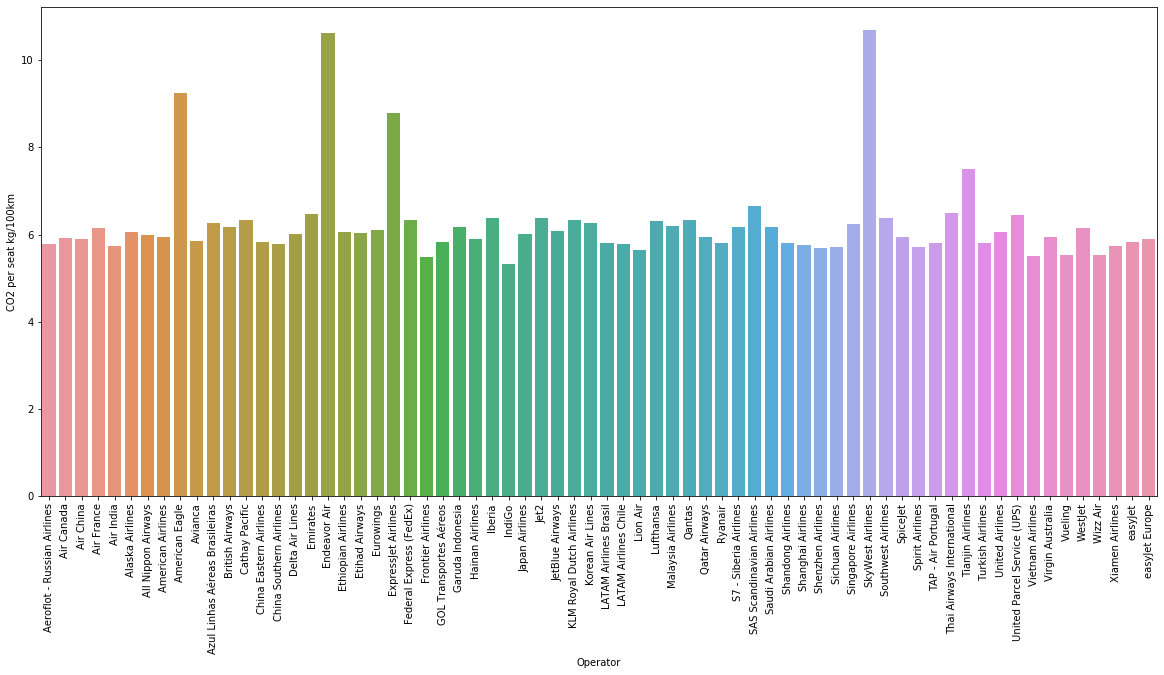

In [24]:
plt.subplots(figsize = (20, 9))
g = sns.barplot(x=plot_airlines.Operator, y = plot_airlines["CO2 per seat kg/100km"], data=plot_airlines)
g.set_xticklabels(plot_airlines.Operator, rotation=90)
g

In [25]:
big_polluters = plot_airlines[plot_airlines["CO2 per seat kg/100km"] > 8]
big_polluters

,Operator,CO2 per seat kg/100km
8,American Eagle,9.246048
17,Endeavor Air,10.610564
21,ExpressJet Airlines,8.774416
50,SkyWest Airlines,10.676280


In [26]:
lufthansa_fleet = aircrafts_airlines[aircrafts_airlines['Operator'] == "Lufthansa CityLine"]
lufthansa_fleet= lufthansa_fleet.reset_index().groupby('Model').count()

In [27]:
lufthansa_fleet

,Seats,First flight,Fuel burn kg/km,Fuel per seat L/100km,Sector km,CO2 per seat kg/100km,CO2 kg/km,Aircraft Manufacturer,Operator,Operator ID,...,Build Country,First Customer Delivery Date,Delivery Date Operator,Exit Date Operator,Nr. of Engines,Engine Manufacturer,Engine Type,Config (Pax/Combi/Cargo/Other),Seat Total,Age (Years)
Model,,,,,,,,,,,,,,,,,,,,,
Airbus A319-100,3,3,3,3,3,3,3,3,3,3,...,3,3,3,0,3,3,3,3,3,3
Bombardier CRJ-100,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,0
Bombardier CRJ-700,9,9,9,9,9,9,9,9,9,9,...,9,9,9,0,9,9,9,9,9,6
Bombardier CRJ-900,35,35,35,35,35,35,35,35,35,35,...,35,35,35,0,35,35,35,35,35,35
Embraer ERJ-190,9,9,9,9,9,9,9,9,9,9,...,9,9,9,0,9,9,9,9,9,9
Embraer ERJ-195,3,3,3,3,3,3,3,3,3,3,...,3,3,3,0,3,3,3,3,3,3
